# Simple gradient descent example
## Christian Igel, 2023

In [1]:
%matplotlib inline
!pip install torch
import matplotlib.pyplot as plt
import torch
import numpy as np


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Husted\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Let's define a two-dimensional quadratic function to be minimized and its gradient:

In [2]:
p_f = 0.5  # some parameter changing the shape of the function
# Quadratic function
def f(x, y):
    return (p_f*x)**2 + y**2 + p_f*x*y
# Gradient of the function
def df(x, y):
    return (p_f**2)*2*x + p_f*y, 2*y + p_f*x, 


Now we optimize the function using gradient descent with leanring rate `eta`.
Try different values, `eta = 0.01`, `eta = 0.1`, `eta = 0.5`, and , `eta = 0.75`, and play with the number of steps.

In [3]:
eta = 0.5
n_iter = 10
r = 1
external_grad = torch.tensor([1.])
x = torch.empty(1, requires_grad = True)
y = torch.empty(1, requires_grad = True)
torch.nn.init.constant_(x, 0.9*r)
torch.nn.init.constant_(y, 0.8*r)

p_x = [torch.Tensor.item(x)]  
p_y = [torch.Tensor.item(y)]  

for jens in range(n_iter):
    Q = (p_f*x)**2 + y**2 + p_f*x*y
    Q.backward(gradient=external_grad)
    torch.optim.SGD([x, y], lr=eta).step()
    y.grad.zero_(), x.grad.zero_()
    p_x.append(torch.Tensor.item(x)), p_y.append(torch.Tensor.item(y))
print(p_x)
print(p_y)

[0.8999999761581421, 0.47499996423721313, 0.41249996423721313, 0.3390624523162842, 0.28007808327674866, 0.23124995827674866, 0.19094234704971313, 0.1576598882675171, 0.1301788091659546, 0.10748784989118576, 0.08875206112861633]
[0.800000011920929, -0.22499996423721313, -0.11874999105930328, -0.10312499105930328, -0.08476561307907104, -0.07001952081918716, -0.057812489569187164, -0.047735586762428284, -0.03941497206687927, -0.03254470229148865, -0.02687196247279644]


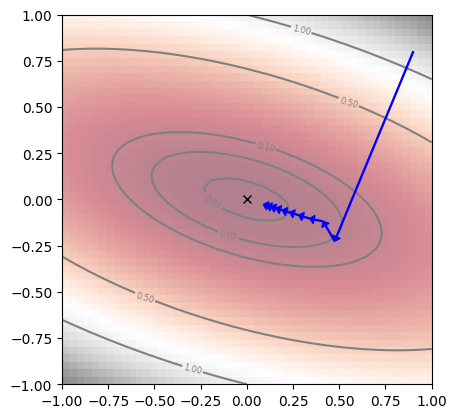

In [4]:
# Make contour plot
x = np.linspace(-r, r, 50)
y = np.linspace(-r, r, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
contours = plt.contour(X, Y, Z, [0.01, 0.05, 0.1, 0.5, 1.], colors='grey')
plt.clabel(contours, inline=True, fontsize=6)
plt.imshow(Z, extent=[-r, r, -r, r], origin='lower', cmap='RdGy', alpha=0.5)

# Add optimum
plt.plot(0, 0, 'x', c='k')

# Plot gradient steps
for i in range(n_iter):
    plt.arrow(p_x[i], p_y[i], p_x[i+1]-p_x[i], p_y[i+1]-p_y[i], width=.005, head_width=.045, head_length=.025, length_includes_head=True, fc='b', ec='b', zorder=10)

In [5]:
tensor = torch.ones(4, requires_grad=True)
print(tensor)

tensor([1., 1., 1., 1.], requires_grad=True)
